<a href="https://colab.research.google.com/github/ozgurshn/Colab-notebooks/blob/master/ISR_Prediction_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/idealo/image-super-resolution/blob/master/notebooks/ISR_Prediction_Tutorial.ipynb)

# Install ISR
(skip if using local repo)

In [0]:
!pip install ISR 

     |████████████████████████████████| 86.3MB 53kB/s 
     |████████████████████████████████| 3.8MB 42.8MB/s 
     |████████████████████████████████| 450kB 48.2MB/s 
     |████████████████████████████████| 81kB 13.2MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

# Predict

Download a sample image

In [0]:
!wget https://i.ibb.co/R3ZP4HH/download.png
!mkdir -p data/input/test_images
!mv *.png data/input/test_images

--2020-02-05 15:22:06--  https://i.ibb.co/R3ZP4HH/download.png
Resolving i.ibb.co (i.ibb.co)... 104.194.8.196, 172.96.140.18
Connecting to i.ibb.co (i.ibb.co)|104.194.8.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53056 (52K) [image/png]
Saving to: ‘download.png’

download.png        100%[===================>]  51.81K  --.-KB/s    in 0.1s    

2020-02-05 15:22:06 (355 KB/s) - ‘download.png’ saved [53056/53056]



Load the image with PIL

In [0]:
import numpy as np
from PIL import Image

img = Image.open('data/input/test_images/download.png')
img 

TypeError: ignored

## Get predictions

### Create the model and run prediction
Create a RRDN or RDN model with the provided pre-trained weights, choose one

In [0]:
# Uncomment if using local repo
# import sys
# sys.path.append('..')
from ISR.models import RDN, RRDN

# model = RDN(weights='noise-cancel')
model = RRDN(weights='gans')
# model = RDN(weights='psnr-small')
# model = RDN(weights='psnr-large')

17465344/17462488 [==============================] - 1s 0us/step


#### Alternatively, load your own weights
To load your own weights first build the model specifying the architecture parameters and then load the weights like with any Keras model.

In [0]:
#rdn = RDN(arch_params={'C': 5, 'D':16, 'G':48, 'G0':52, 'x':3})
#rdn.model.load_weights('PATH/TO/WEIGHTS')

#### Baseline

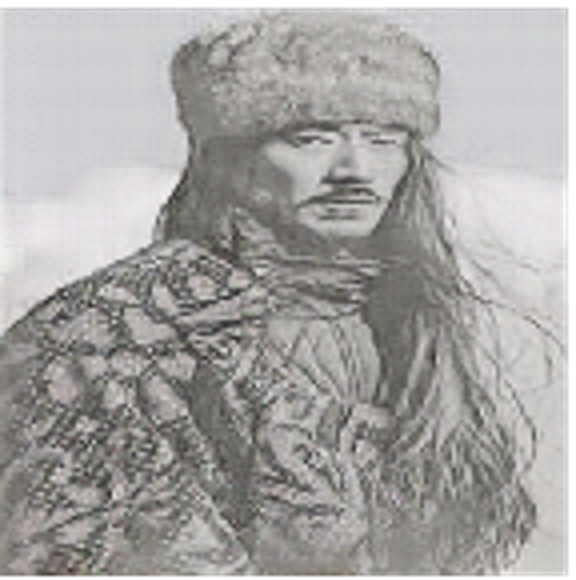

In [0]:
img.resize(size=(img.size[0]*4, img.size[1]*4), resample=Image.BICUBIC)

In [0]:
np.array(img)[...,:3].shape

(145, 144, 3)

#### Prediction

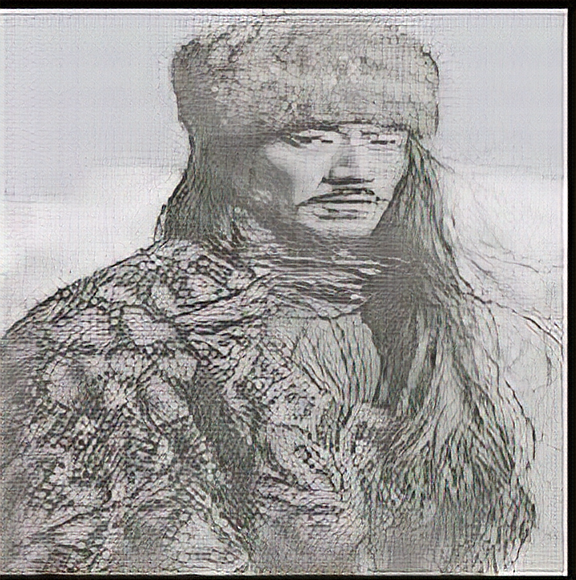

In [0]:
sr_img = model.predict(np.array(img)[...,:3])
Image.fromarray(sr_img)

### Usecase: upscaling noisy images

Compress the image into the jpeg format to introduce compression artefact and lose some information.

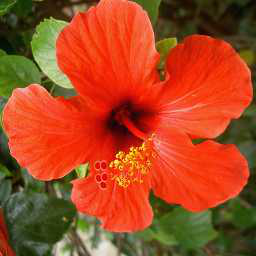

In [0]:
img.save('data/input/test_images/compressed.jpeg','JPEG', dpi=[300, 300], quality=50)
compressed_img = Image.open('data/input/test_images/compressed.jpeg')

compressed_img

#### Baseline

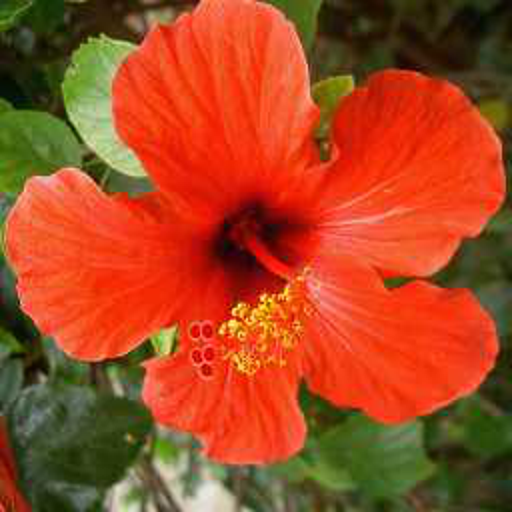

In [0]:
compressed_img.resize(size=(compressed_img.size[0]*2, compressed_img.size[1]*2), resample=Image.BICUBIC)

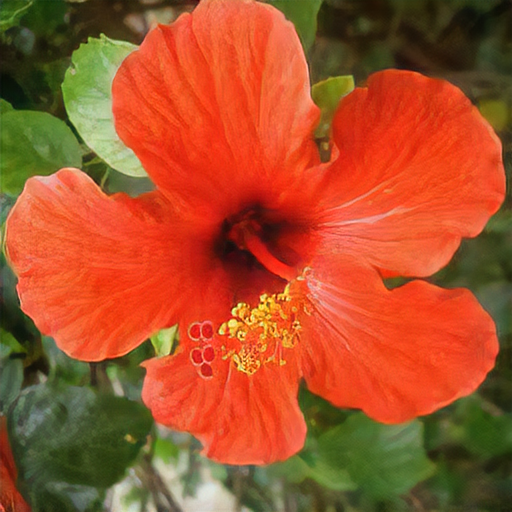

In [0]:
model = RDN(weights='noise-cancel')
sr_img = model.predict(np.array(compressed_img))
Image.fromarray(sr_img)

### Predictor Class
You can also use the predictor class to run the model on entire folders:

In [0]:
from ISR.predict import Predictor
!mkdir -p data/output
predictor = Predictor(input_dir='data/input/test_images/')
predictor.get_predictions(model=rdn, weights_path='weights/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5')